In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
points_X, points_Y = make_circles(n_samples=1000, noise=0.1, random_state=15, factor=0.1)

In [3]:
# points_Y

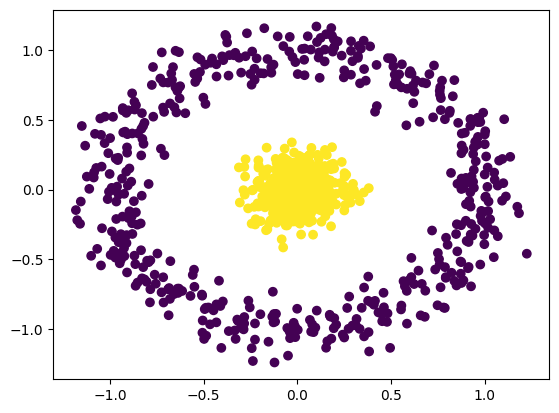

In [4]:
plt.scatter(points_X[:, 0], points_X[:, 1], c = points_Y)

In [5]:
points_X.shape

(1000, 2)

In [6]:
X1 = points_X[:, 0].reshape(-1, 1)
X2 = points_X[:, 1].reshape(-1, 1)
print(X1.shape)
X3 = X1 + X2

print(X3.shape)

(1000, 1)
(1000, 1)


In [7]:
points_X = np.hstack((points_X, X3))

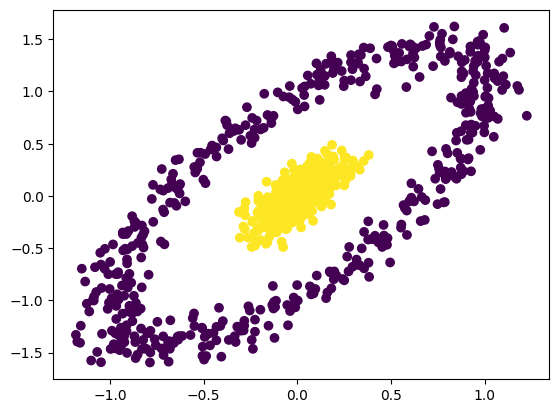

In [8]:
plt.scatter(points_X[:, 0], points_X[:, 2], c = points_Y)

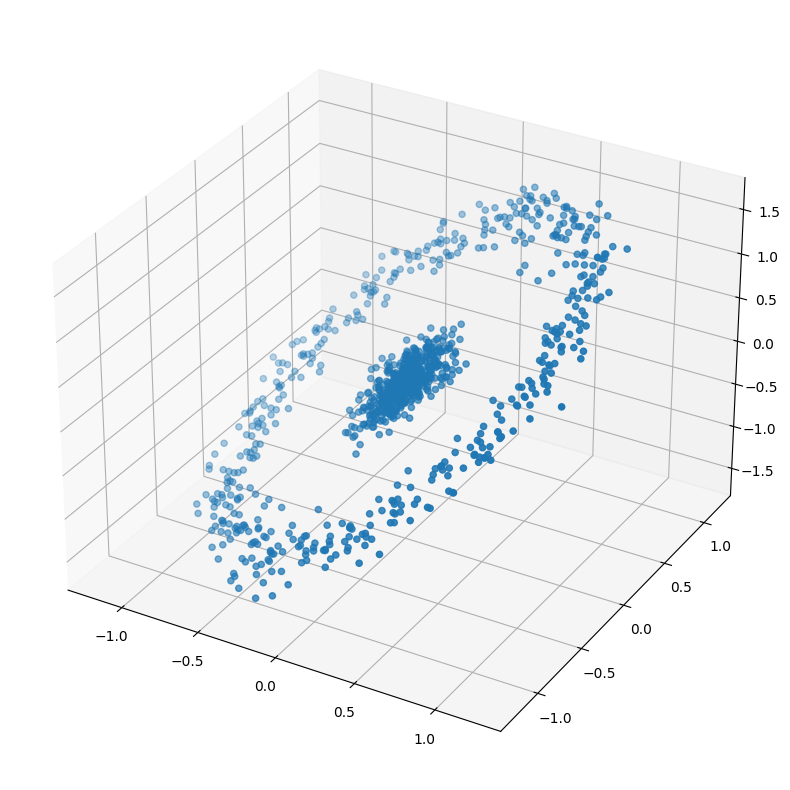

In [9]:
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(projection = '3d')
ax.scatter(points_X[:, 0], points_X[:, 1], points_X[:, 2])

In [10]:
points_X.shape, points_Y.shape

((1000, 3), (1000,))

In [11]:
from sklearn import svm

In [12]:
my_svm = svm.SVC?

Init signature:
svm.SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see

In [13]:
my_svm = svm.SVC(kernel='poly', C = 1, degree = 10)
my_svm.fit(points_X, points_Y)

SVC(C=1, degree=10, kernel='poly')

In [14]:
bias = my_svm.intercept_
print(bias)

[1.00061216]


In [15]:
my_svm.score(points_X, points_Y)

0.989

In [16]:
my_svm = svm.SVC(kernel='rbf', C = 1, degree=5)
my_svm.fit(points_X, points_Y)

SVC(C=1, degree=5)

In [17]:
my_svm.score(points_X, points_Y)

1.0

In [18]:
my_svm = svm.SVC(kernel='linear', C = 1, degree=5)
my_svm.fit(points_X, points_Y)

SVC(C=1, degree=5, kernel='linear')

In [ ]:
my_svm.score(points_X, points_Y)

weights = my_svm.coef_
bias = my_svm.intercept_

bias

mesh_X, mesh_Y = np.meshgrid(points_X[:, 0], points_X[:, 1])

plane = -(weights[0][0]*mesh_X + weights[0][1]*mesh_Y + bias[0])/weights[0][2]

plane.shape

# print(plane.reshape(-1, 1).shape)
# print(points_X[:, 0].shape)
# p = np.array(np.meshgrid(points_X[:, 0], plane))
# print(p.shape)

from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(projection = '3d')
ax.scatter(points_X[:, 0], points_X[:, 1], points_X[:, 2], c = points_Y)
# plane_mesh = np.meshgrid(points_X[:, 0].reshape(-1, 1), plane.reshape(-1, 1))
# plane_mesh = np.array(plane_mesh)
# print(np.array(plane_mesh).shape)
ax.plot_surface(mesh_X, mesh_Y, plane)